<a href="https://colab.research.google.com/github/swiryat/Alice-skill/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22DEMO_regression_classification%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Импорт классов и функций для построения моделей и предобработки данных
from sklearn.linear_model import (
    HuberRegressor,      # Устойчивый к выбросам регрессионный алгоритм
    LinearRegression,    # Классическая линейная регрессия
    LogisticRegression   # Логистическая регрессия для задач классификации
)
from sklearn.preprocessing import PolynomialFeatures  # Генерация полиномиальных признаков
from sklearn.model_selection import train_test_split  # Разделение данных на обучающую и тестовую выборки
from sklearn.metrics import (  # Метрики оценки качества модели
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    median_absolute_error,
    explained_variance_score,
    max_error,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

from sklearn.base import BaseEstimator  # Базовый класс для пользовательских моделей
from sklearn.datasets import make_classification  # Генерация синтетических данных для классификации

from typing import Dict, Any, Tuple  # Типизация для улучшения читаемости и автодополнения

# Настройки отображения данных в Pandas
pd.set_option('display.max_columns', 50)  # Отображать до 50 столбцов
pd.set_option('display.max_rows', 20)     # Отображать до 20 строк
pd.options.display.float_format = '{:.2f}'.format  # Формат чисел: два знака после запятой

# Настройка вывода графиков в Jupyter Notebook (формат SVG для лучшего качества)
%config InlineBackend.figure_format = 'svg'


#<font color='green' size=6>**Про переобучение**

В  машинном обучение есть важное свойство "способность модели к обобщению", то есть способность модели работать хорошо на новых, неизвестных тестовых данных.

Если модель научилась идеально предсказывать выборку, на которой она обучалась,то чаще всего она не выявила никакой закономерности, а следовательно она не имеет практической ценности, такую модель будем называть переобученной



MSE on test data: 54323.85 and MSE on train data: 5.76


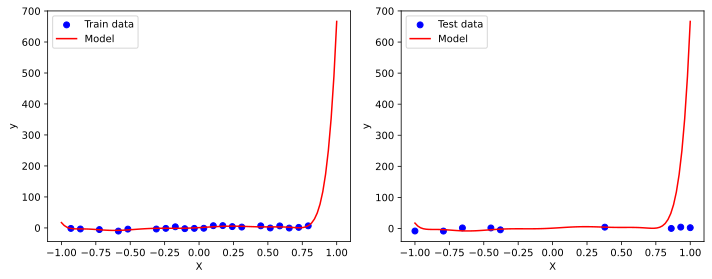

In [ ]:
# Генерация данных
X = np.linspace(-1, 1, 30)
np.random.seed(123)
y = 5*X + np.random.randn(*X.shape) * 3  # Добавляем  шум

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Преобразование данных с использованием полиномиальных признаков
degree = 10  # Степень полинома
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Оценка модели на тестовых данных
y_test_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on test data: {round(mse_test,2)} and MSE on train data: {round(mse_train,2)}")

# Генерация значений X для графиков
X_plot = np.linspace(-1, 1, 100)
X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))

# Печать графиков с помощью subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# График с обучающими данными и предсказаниями
ax[0].scatter(X_train, y_train, color='blue', label='Train data')
ax[0].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()

# График с тестовыми данными и предсказаниями
ax[1].scatter(X_test, y_test, color='blue', label='Test data')
ax[1].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()


#<font color='green' size=6>**Линейная регрессия**

**Линейная регрессия** &mdash; это модель следующего вида:
$a(x) = \langle w, x \rangle$, где $w \in \mathbb{R}^d$.

Обучить линейную регрессию &mdash; значит найти $w = [w_0, w_1, w_2, ... , w_n]$.

##<font color='blue' size=5> Рассмотрим пример с выбросами в данных

In [ ]:
# Создание случайных данных с выбросами
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1) * 10
y = 2 * X.squeeze() + np.random.randn(n_samples) * 2
# Добавление выбросов
X[95:] = 10
y[95:] = -50

X[96:] = 2
y[96:] = 20

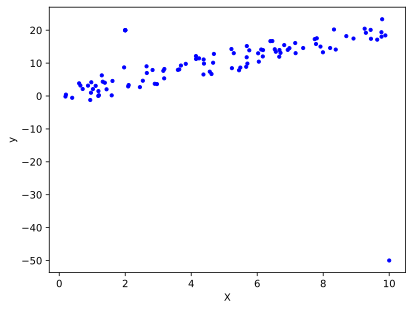

In [ ]:
# Построение графика
plt.scatter(X, y, color='blue', label='Data', s=10)

plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#подготовка тестового и тренировочного наборов данных

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

| Характеристика              | LinearRegression                | HuberRegressor                    |
|-----------------------------|----------------------------------|-----------------------------------|
| Метод оптимизации           | Метод наименьших квадратов       | Итеративный метод с использованием Huber loss |
| Скорость вычислений         | Медленный на больших данных      | Быстрее на больших данных по сравнению с LinearRegression       |
| Сходимость                  | Гарантирована                    | Зависит от гиперпараметров и условий      |
| Память                      | Высокие требования               | Низкие требования                 |
| Настройка параметров        | Минимальная                      | Требуется настройка гиперпараметра $\alpha$   |
| Применение на больших данных| Неэффективен                     | Эффективен                        |
| Мультиколлинеарность        | Может страдать от мультиколлинеарности | Менее чувствителен к мультиколлинеарности |
| Устойчивость к выбросам     | Низкая                           | Высокая                           |


**Loss function**

$L(y, y_{pred}) = MSE = \frac{1}{N}\sum_{i=1}^N(y_i - y_i^{pred})^2, $

In [ ]:
# Линейная регрессия с MSE
reg_mse = LinearRegression()
reg_mse.fit(X_train, y_train)


LinearRegression()

In [ ]:
reg_mse.intercept_

np.float64(7.511088224604111)

In [ ]:
reg_mse.coef_[0]

np.float64(-0.2904636781171318)

In [ ]:
print(f'y = {reg_mse.intercept_} + {reg_mse.coef_[0]}*x')

y = 7.511088224604111 + -0.2904636781171318*x


In [ ]:
reg_mse.coef_

array([-0.29046368])

In [ ]:
reg_mse.predict(X_test)

array([6.58746259, 5.8653168 , 5.85999407, 6.30780469, 5.43041788,
       5.09263   , 5.73317247, 7.32476305, 7.23195725, 6.44007553,
       7.12826331, 5.53064791, 5.61404576, 4.64022122, 6.23711014,
       6.18613719, 5.26222057, 5.5743731 , 6.65090851, 5.21141456])

**Loss function**

$L(y, y_{pred}) = \begin{cases}
\sum_{i=1}^N(\frac{1}{2}(y_i - y_i^{\text{pred}})^2, если  |y_i - y_i^{\text{pred}}| \leq \epsilon \\
\sum_{i=1}^N\epsilon|y_i - y_i^{\text{pred}}| - \frac{1}{2}\epsilon^2, если |y_i - y_i^{\text{pred}}| > \epsilon \\
\end{cases}$

In [ ]:
# Линейная регрессия с Huber функцией
reg_huber = HuberRegressor(epsilon=1.35)
reg_huber.fit(X_train, y_train)

HuberRegressor()

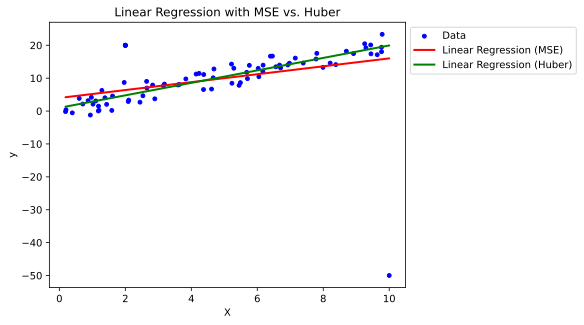

In [ ]:
# Построение графика
plt.scatter(X_train, y_train, color='blue', label='Data', s=15)
plt.plot(X_train, reg_mse.predict(X_train), color='red', linewidth=2, label='Linear Regression (MSE)')
plt.plot(X_train, reg_huber.predict(X_train), color='green', linewidth=2, label='Linear Regression (Huber)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with MSE vs. Huber')
plt.show()

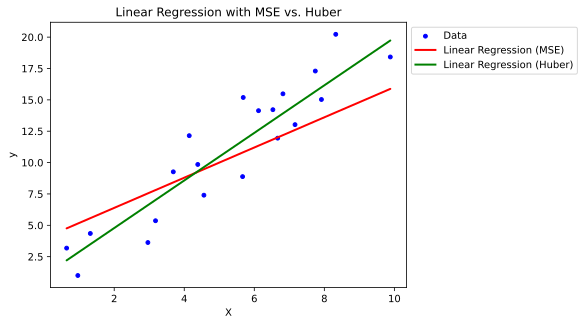

In [ ]:
# Построение графика
plt.scatter(X_test, y_test, color='blue', label='Data', s=15)
plt.plot(X_test, reg_mse.predict(X_test), color='red', linewidth=2, label='Linear Regression (MSE)')
plt.plot(X_test, reg_huber.predict(X_test), color='green', linewidth=2, label='Linear Regression (Huber)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with MSE vs. Huber')
plt.show()

In [ ]:
print(f'мы построили линейную регрессию (Huber) y = {round(reg_huber.intercept_, 2)} + {round(reg_huber.coef_[0], 2)}*x')


мы построили линейную регрессию (Huber) y = 0.85 + 1.85*x


In [ ]:
print(f'мы построили линейную регрессию (MSE) y = {round(reg_mse.intercept_, 2)} + {round(reg_mse.coef_[0], 2)}*x')


мы построили линейную регрессию (MSE) y = 7.51 + -0.29*x


##<font color='blue' size=5> Метрики качества регрессии

In [ ]:
def calc_metrics(
    model,
    df: pd.DataFrame,
    y: pd.Series,
    type_sample: str
) -> dict:
    """
    Вычисляет базовые регрессионные метрики на обучающей выборке.

    Метрики:
    - MAE (Mean Absolute Error)
    - RMSE (Root Mean Squared Error)
    - MAPE (Mean Absolute Percentage Error)
    - SMAPE (Symmetric Mean Absolute Percentage Error)

    Параметры:
    ----------
    model :
        Обученная регрессионная модель.

    df : pd.DataFrame | np.ndarray
        Признаки обучающей выборки.

    y : pd.Series | np.ndarray
        Целевая переменная (фактическое значение)

    type_sample: название выборки

    Возвращает:
    -----------
    dict_metrics :
        Словарь с названиями метрик и их значениями.
    """
    pred = model.predict(df)

    # Метрики
    mae = mean_absolute_error(y, pred)
    rmse = root_mean_squared_error(y, pred)
    mape = np.mean(np.abs((y - pred) / y)) * 100
    smape = 100 * np.mean(
        2 * np.abs(y - pred) / (np.abs(y) + np.abs(pred))
    )

    dict_metrics = {
        'metrics': ['mae', 'rmse', 'mape', 'smape'],
        f'values_{type_sample}': [mae, rmse, mape, smape]
    }

    return dict_metrics


In [ ]:
metrics_test = pd.DataFrame(calc_metrics(reg_mse, X_test, y_test, 'test'))
metrics_test

,metrics,values_test
0,mae,6.75
1,rmse,7.84
2,mape,86.59
3,smape,75.67


In [ ]:
metrics_train = pd.DataFrame(calc_metrics(reg_mse, X_train, y_train, 'train'))
metrics_train

,metrics,values_train
0,mae,9.60
1,rmse,15.61
2,mape,717.25
3,smape,90.85


In [ ]:
metrics_reg_mse = metrics_train.merge(metrics_test, on='metrics')
metrics_reg_mse

,metrics,values_train,values_test
0,mae,9.60,6.75
1,rmse,15.61,7.84
2,mape,717.25,86.59
3,smape,90.85,75.67


In [ ]:
metrics_reg_huber = pd.DataFrame(calc_metrics(reg_huber, X_train, y_train, 'train')).merge(pd.DataFrame(calc_metrics(reg_huber, X_test, y_test, 'test')),
                                                                                           on='metrics')
metrics_reg_huber

,metrics,values_train,values_test
0,mae,5.97,1.85
1,rmse,17.46,2.10
2,mape,282.05,27.56
3,smape,45.88,23.77


In [ ]:
def get_plots(
    model,
    df_train: pd.DataFrame,
    y_train: pd.Series
) -> None:
    """
    Строит визуализации качества модели на обучающей выборке:
    1. Scatter plot прогноза против фактических значений.
    2. Гистограмма остатков (ошибок предсказания).
    3. Q-Q график квантилей прогноза против квантилей факта.

    Параметры:
    ----------
    model :
        Обученная регрессионная модель, реализующая метод `predict`.

    df_train : pd.DataFrame | np.ndarray
        Признаки обучающей выборки.

    y_train : pd.Series | np.ndarray
        Истинные значения целевой переменной.
    """
    pred_train = model.predict(df_train)

    # Создание фигуры с 3 подграфиками
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # === 1. Прогноз vs Факт ===
    sns.scatterplot(x=pred_train, y=y_train, ax=axes[0], alpha=0.7)
    axes[0].set_title("Data")
    axes[0].set_xlabel("Прогноз")
    axes[0].set_ylabel("Факт")

    # === 2. Остатки ===
    resid_train = pred_train - y_train
    sns.histplot(resid_train, bins=40, ax=axes[1], kde=True, color='orange')
    axes[1].set_title("Residuals (pred - true)")
    axes[1].set_xlabel("Остатки")
    axes[1].set_ylabel("Частота")

    # === 3. Q-Q Plot ===
    quantiles_train_pred = np.percentile(pred_train, np.linspace(0, 100, num=200))
    quantiles_train_fact = np.percentile(y_train, np.linspace(0, 100, num=200))
    sns.scatterplot(x=quantiles_train_pred, y=quantiles_train_fact, ax=axes[2])
    axes[2].set_title("Q-Q Plot")
    axes[2].set_xlabel("Квантили прогноза")
    axes[2].set_ylabel("Квантили факта")

    # Общий заголовок
    fig.suptitle("Анализ модели на данных", ha='center', fontsize=14)
    plt.tight_layout()
    plt.show()


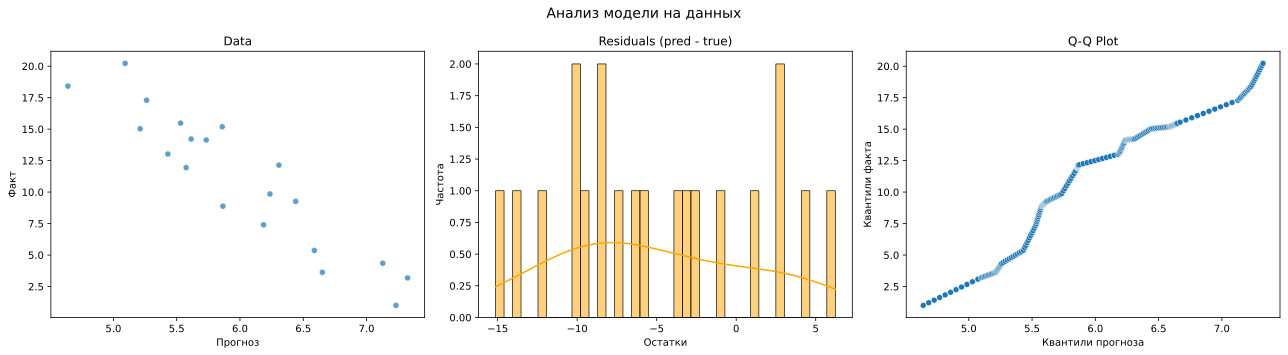

In [ ]:
get_plots(reg_mse, X_test, y_test)

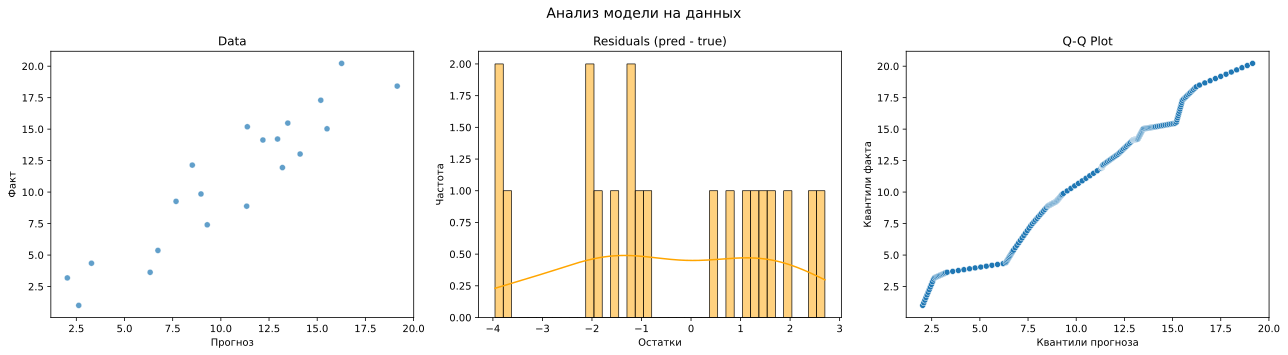

In [ ]:
get_plots(reg_huber, X_test, y_test)

##<font color='blue' size=5> Полиномиальная регрессия

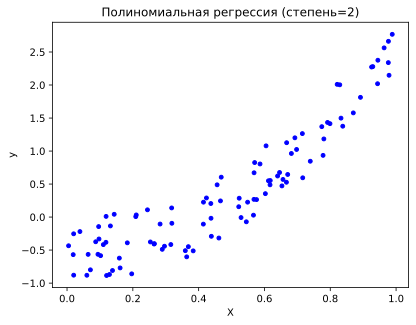

In [ ]:
# Создание синтетических данных
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 * X**2  - np.random.rand(100, 1)

# Визуализация результатов
plt.scatter(X, y, color='blue', s=15)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (степень=2)')
plt.show()


In [ ]:
#подготовка тестового и тренировочного наборов данных

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
# Преобразование в матрицу признаков с полиномиальными признаками
# На обучающей выборке вызывается fit_transform — происходит обучение (fit) и преобразование (transform)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# На тестовой выборке вызывается только transform — применяем ту же трансформацию, обученную на X_train
# Это важно для предотвращения утечки данных и корректной оценки модели
X_test_poly = poly_features.transform(X_test)


In [ ]:
# Обучение модели полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# прогноз модели
y_train_pred_poly = poly_reg.predict(X_train_poly)

In [ ]:
# Обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# прогноз модели
y_train_pred = lin_reg.predict(X_train)

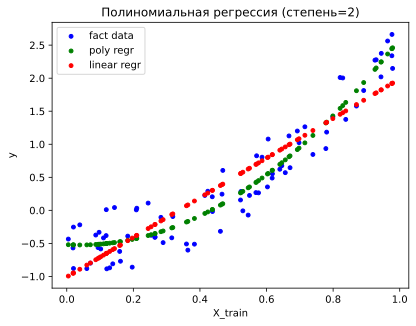

In [ ]:
# Визуализация результатов
plt.scatter(X_train, y_train, color='blue', s=15, label='fact data')
plt.scatter(X_train, y_train_pred_poly, color='green', s=15, label='poly regr')
plt.scatter(X_train, y_train_pred, color='red', s=15, label='linear regr')
plt.xlabel('X_train')
plt.ylabel('y')
plt.legend()
plt.title('Полиномиальная регрессия (степень=2)')
plt.show()

In [ ]:
pd.DataFrame(calc_metrics(poly_reg, X_train_poly, y_train, 'train'))

,metrics,values_train
0,mae,0.23
1,rmse,0.27
2,mape,274.36
3,smape,60.88


In [ ]:
pd.DataFrame(calc_metrics(lin_reg, X_train, y_train, 'train'))

,metrics,values_train
0,mae,0.32
1,rmse,0.38
2,mape,375.75
3,smape,64.77


#<font color='green' size=6> **Логистическая регрессия**

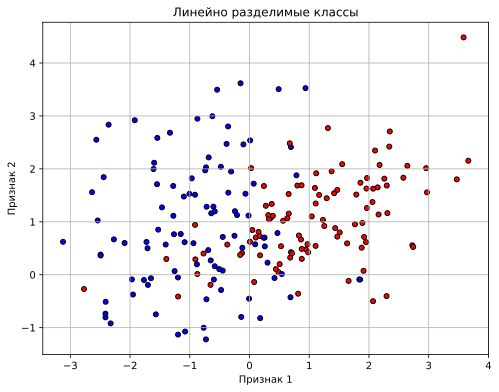

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Генерируем синтетические данные с более чёткой линейной разделимостью
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1,     # разделение между классами
    flip_y=0,          # без случайного шума
    random_state=42
)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr', edgecolors='k')
plt.title("Линейно разделимые классы")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()


In [ ]:
#подготовка тестового и тренировочного наборов данных

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
# Создаем экземпляр модели логистической регрессии
model_log_reg = LogisticRegression()

In [ ]:
# Обучаем модель на данных
model_log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_log_reg.predict(X_train)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0])

In [ ]:
model_log_reg.predict_proba(X_train)

array([[0.04007225, 0.95992775],
       [0.02872521, 0.97127479],
       [0.22927962, 0.77072038],
       [0.04037566, 0.95962434],
       [0.97853262, 0.02146738],
       [0.06138374, 0.93861626],
       [0.47819699, 0.52180301],
       [0.40080212, 0.59919788],
       [0.16159611, 0.83840389],
       [0.05515957, 0.94484043],
       [0.01890384, 0.98109616],
       [0.7773032 , 0.2226968 ],
       [0.85610949, 0.14389051],
       [0.23529819, 0.76470181],
       [0.0033261 , 0.9966739 ],
       [0.41137718, 0.58862282],
       [0.41428668, 0.58571332],
       [0.72291885, 0.27708115],
       [0.34727485, 0.65272515],
       [0.95143569, 0.04856431],
       [0.10585987, 0.89414013],
       [0.8399729 , 0.1600271 ],
       [0.13003765, 0.86996235],
       [0.72294349, 0.27705651],
       [0.86774015, 0.13225985],
       [0.55851182, 0.44148818],
       [0.70216056, 0.29783944],
       [0.70477429, 0.29522571],
       [0.06270521, 0.93729479],
       [0.33516783, 0.66483217],
       [0.

##<font color='blue' size=5> Метрики качества классификации

In [ ]:
def calc_optimal_cutoff(model,
      X: np.ndarray,
      y: np.ndarray,) -> float:
    """
    Вычисляет оптимальный порог классификации, максимизирующий F1-меру.

    Параметры:
    ----------
    model :
        Обученная модель, реализующая метод predict_proba.

    X : np.ndarray
        Признаки выборки, по которой проводится оценка.

    y : np.ndarray
        Истинные метки классов.

    Возвращает:
    -----------
    best_threshold : float
        Порог вероятности, при котором достигается максимальная F1-мера.
    """
    # Предсказание вероятностей
    y_pred = model.predict_proba(X)[:, 1]

    f1_scores = []
    thresholds = np.linspace(0, 1, num=100)

    for threshold in thresholds:
        y_pred_thresholded = (y_pred >= threshold).astype(int)
        f1 = f1_score(y, y_pred_thresholded)
        f1_scores.append(f1)

    best_f1_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_f1_index]

    print("Оптимальный порог:", best_threshold)
    print("Максимальная F1-мера:", f1_scores[best_f1_index])

    return best_threshold


In [ ]:
def calculate_metrics_and_plot_roc(
    model,
    X: np.ndarray,
    y: np.ndarray,
    best_threshold:float
) -> dict:
    """
    Рассчитывает метрики классификации и строит ROC-кривую для одной выборки.

    Параметры:
    ----------
    model :
        Обученная модель, реализующая метод predict_proba.

    X : np.ndarray
        Признаки выборки, по которой проводится оценка.

    y : np.ndarray
        Истинные метки классов.

    best_threshold:
      Трешхолд для бинарного прогноза

    Возвращает:
    -----------
    metrics : dict
        Словарь с метриками: Precision, Recall и ROC-AUC.
    """
    # Предсказание вероятностей
    y_proba = model.predict_proba(X)[:, 1]

    # Прогноз с учетом порога
    y_pred = (y_proba >= best_threshold).astype(int)

    # Метрики
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    try:
        roc_auc = roc_auc_score(y, y_proba)
        print(f"ROC-AUC: {roc_auc:.2f}")

        fpr, tpr, _ = roc_curve(y, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve ({type(model).__name__})')
        plt.legend()
        plt.show()
    except Exception as e:
        print(e)
        roc_auc = 0

    metrics = {
        'params': ['Precision', 'Recall', 'ROC-AUC'],
        'values': [precision, recall, roc_auc]
    }

    return metrics

In [ ]:
# Вычисление оптимального порога отсечения
best_threshold = calc_optimal_cutoff(model_log_reg, X_train, y_train)

Оптимальный порог: 0.4444444444444445
Максимальная F1-мера: 0.84472049689441


Precision: 0.82
Recall: 0.87
ROC-AUC: 0.91


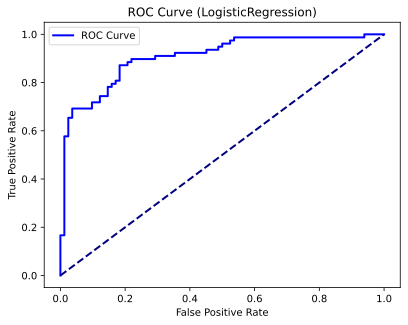

In [ ]:
metrics_train = calculate_metrics_and_plot_roc(model_log_reg, X_train, y_train, best_threshold)

In [ ]:
pd.DataFrame(metrics_train)

,params,values
0,Precision,0.82
1,Recall,0.87
2,ROC-AUC,0.91


Precision: 0.88
Recall: 0.95
ROC-AUC: 0.95


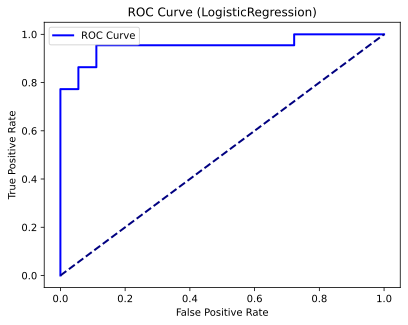

In [ ]:
metrics_test = calculate_metrics_and_plot_roc(model_log_reg, X_test, y_test, best_threshold)

In [ ]:
pd.DataFrame(metrics_test)

,params,values
0,Precision,0.88
1,Recall,0.95
2,ROC-AUC,0.95


##<font color='red' size=5> **Данная визуализация возможна только двумерного случая!**

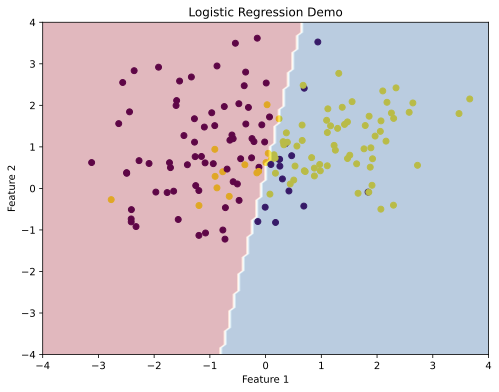

In [ ]:
# Визуализируем данные и границу принятия решений
plt.figure(figsize=(8, 6))

# Визуализируем точки данных
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# Создаем сетку для визуализации границы принятия решений
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = model_log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Визуализируем границу принятия решений
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Demo')
plt.show()
